In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [68]:
original_data_frame = pd.read_csv('evaluation_final_results.csv')


original_data_frame = original_data_frame[original_data_frame["STATUS"] == "SUCCESS"]

original_data_frame

,NAME,TRANSFER-FACTOR-SIZE,TRANSFER-FACTOR-TIME,MAKESPAN,N,T,STATUS,CONFIG,DISTRIBUTION,RUN_COUNT,RND_COUNT
0,aggregation0,0.480848,0.914250,173460.3850,0,0,SUCCESS,site_conf_2_site,0,1,-1
1,aggregation0,0.459166,0.810174,150233.2975,0,0,SUCCESS,site_conf_2_site,0,1,0
2,aggregation0,0.430077,0.747849,142726.9100,0,0,SUCCESS,site_conf_2_site,0,1,1
3,aggregation0,0.509558,0.941832,150120.6025,0,0,SUCCESS,site_conf_2_site,0,1,2
4,aggregation0,0.550096,0.950936,171382.4175,0,0,SUCCESS,site_conf_2_site,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
22935,Sipht_30.xml,0.072199,0.001339,9813.0600,0,0,SUCCESS,site_conf_4_site,4,740,25
22936,Sipht_30.xml,0.070849,0.001337,9810.6500,0,0,SUCCESS,site_conf_4_site,4,740,26
22937,Sipht_30.xml,0.071773,0.001402,9810.6500,0,0,SUCCESS,site_conf_4_site,4,740,27
22938,Sipht_30.xml,0.070295,0.001308,9817.8050,0,0,SUCCESS,site_conf_4_site,4,740,28


In [69]:
our_approach = original_data_frame[original_data_frame['RND_COUNT'] == -1]
our_approach

,NAME,TRANSFER-FACTOR-SIZE,TRANSFER-FACTOR-TIME,MAKESPAN,N,T,STATUS,CONFIG,DISTRIBUTION,RUN_COUNT,RND_COUNT
0,aggregation0,0.480848,0.914250,173460.3850,0,0,SUCCESS,site_conf_2_site,0,1,-1
31,aggregation0,0.442794,0.901529,154490.2300,0,0,SUCCESS,site_conf_2_site,1,2,-1
62,aggregation0,0.360600,0.859723,125023.7800,0,0,SUCCESS,site_conf_2_site,2,3,-1
93,aggregation0,0.355952,0.741607,141377.6000,0,0,SUCCESS,site_conf_2_site,3,4,-1
124,aggregation0,0.482831,0.987680,166717.9925,0,0,SUCCESS,site_conf_2_site,4,5,-1
...,...,...,...,...,...,...,...,...,...,...,...
22785,Sipht_30.xml,0.006312,0.000472,9810.5800,0,0,SUCCESS,site_conf_4_site,0,736,-1
22816,Sipht_30.xml,0.007843,0.001083,9858.4900,0,0,SUCCESS,site_conf_4_site,1,737,-1
22847,Sipht_30.xml,0.007663,0.000511,9810.5800,0,0,SUCCESS,site_conf_4_site,2,738,-1
22878,Sipht_30.xml,0.009514,0.000980,9858.4800,0,0,SUCCESS,site_conf_4_site,3,739,-1


In [70]:
rnd_runs = original_data_frame[original_data_frame['RND_COUNT'] != -1]
rnd_runs

,NAME,TRANSFER-FACTOR-SIZE,TRANSFER-FACTOR-TIME,MAKESPAN,N,T,STATUS,CONFIG,DISTRIBUTION,RUN_COUNT,RND_COUNT
1,aggregation0,0.459166,0.810174,150233.2975,0,0,SUCCESS,site_conf_2_site,0,1,0
2,aggregation0,0.430077,0.747849,142726.9100,0,0,SUCCESS,site_conf_2_site,0,1,1
3,aggregation0,0.509558,0.941832,150120.6025,0,0,SUCCESS,site_conf_2_site,0,1,2
4,aggregation0,0.550096,0.950936,171382.4175,0,0,SUCCESS,site_conf_2_site,0,1,3
5,aggregation0,0.524043,0.995747,148889.3700,0,0,SUCCESS,site_conf_2_site,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
22935,Sipht_30.xml,0.072199,0.001339,9813.0600,0,0,SUCCESS,site_conf_4_site,4,740,25
22936,Sipht_30.xml,0.070849,0.001337,9810.6500,0,0,SUCCESS,site_conf_4_site,4,740,26
22937,Sipht_30.xml,0.071773,0.001402,9810.6500,0,0,SUCCESS,site_conf_4_site,4,740,27
22938,Sipht_30.xml,0.070295,0.001308,9817.8050,0,0,SUCCESS,site_conf_4_site,4,740,28


In [71]:
rnd_runs_aggregated = rnd_runs.groupby(["NAME", "N", "T", "STATUS", "CONFIG", "DISTRIBUTION", "RUN_COUNT"])[["TRANSFER-FACTOR-SIZE", "TRANSFER-FACTOR-TIME", "MAKESPAN"]].agg(["mean", "std"]).reset_index()
rnd_runs_aggregated

NAME  N  T   STATUS            CONFIG DISTRIBUTION RUN_COUNT  \
                                                                               
0     CyberShake_100  0  0  SUCCESS  site_conf_2_site            0       641   
1     CyberShake_100  0  0  SUCCESS  site_conf_2_site            1       642   
2     CyberShake_100  0  0  SUCCESS  site_conf_2_site            2       643   
3     CyberShake_100  0  0  SUCCESS  site_conf_2_site            3       644   
4     CyberShake_100  0  0  SUCCESS  site_conf_2_site            4       645   
..               ... .. ..      ...               ...          ...       ...   
725  redistribution4  0  0  SUCCESS  site_conf_4_site            0       596   
726  redistribution4  0  0  SUCCESS  site_conf_4_site            1       597   
727  redistribution4  0  0  SUCCESS  site_conf_4_site            2       598   
728  redistribution4  0  0  SUCCESS  site_conf_4_site            3       599   
729  redistribution4  0  0  SUCCESS  site_conf_4_site            4       600   

    TRANSFER-FACTOR-SIZE           TRANSFER-FACTOR-TIME            \
                    mean       std                 mean       std   
0               0.543655  0.003313             1.344475  0.005734   
1               0.403372  0.070442             0.532968  0.132808   
2               0.546651  0.001318             1.189164  0.052941   
3               0.534180  0.003297             1.009306  0.081854   
4               0.362195  0.069029             0.534500  0.234611   
..                   ...       ...                  ...       ...   
725             0.748399  0.029209             0.972326  0.096941   
726             0.750466  0.029616             0.964659  0.110236   
727             0.741728  0.028413             0.982913  0.123111   
728             0.738989  0.031327             0.952054  0.159992   
729             0.744169  0.031953             0.954984  0.082854   

          MAKESPAN                
              mean           std  
0      2991.268000      1.382446  
1      4822.803833    574.206923  
2      2949.456500    149.473982  
3      3611.794083    302.520761  
4      4905.010083    985.629059  
..             ...           ...  
725  325063.029833  26718.018940  
726  323001.728833  22764.432883  
727  323317.667750  28512.462713  
728  331070.270250  26770.939486  
729  324863.564000  21237.610677  

[730 rows x 13 columns]

In [72]:
rnd_runs_splitted = rnd_runs.groupby(["NAME", "RUN_COUNT"])


In [73]:
rnd_distributions = dict()
for key, df in rnd_runs_splitted:
    rnd_distributions[key] = stats.shapiro(df["TRANSFER-FACTOR-SIZE"])[1] > 0.05
    # rnd_distributions[key] = stats.shapiro(df["MAKESPAN"])[1] > 0.05

rnd_distributions
# stats.shapiro(list(rnd_runs_splitted)[60][1]["TRANSFER-FACTOR-SIZE"])[1] > 0.05

/home/fk/miniconda3/envs/experiments_master/lib/python3.8/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


{('CyberShake_100', 641): False,
 ('CyberShake_100', 642): True,
 ('CyberShake_100', 643): False,
 ('CyberShake_100', 644): False,
 ('CyberShake_100', 645): True,
 ('CyberShake_100', 646): True,
 ('CyberShake_100', 647): False,
 ('CyberShake_100', 648): True,
 ('CyberShake_100', 649): True,
 ('CyberShake_100', 650): True,
 ('CyberShake_100', 651): False,
 ('CyberShake_100', 652): True,
 ('CyberShake_100', 653): False,
 ('CyberShake_100', 654): False,
 ('CyberShake_100', 655): False,
 ('CyberShake_100', 656): True,
 ('CyberShake_100', 657): True,
 ('CyberShake_100', 658): False,
 ('CyberShake_100', 659): True,
 ('CyberShake_100', 660): False,
 ('CyberShake_1000', 661): True,
 ('CyberShake_1000', 662): True,
 ('CyberShake_1000', 663): True,
 ('CyberShake_1000', 664): False,
 ('CyberShake_1000', 665): False,
 ('CyberShake_1000', 666): False,
 ('CyberShake_1000', 667): False,
 ('CyberShake_1000', 668): False,
 ('CyberShake_1000', 669): True,
 ('CyberShake_1000', 670): True,
 ('CyberShake_1

In [74]:
results = {}
# Group by RUN_COUNTER and perform the test
for run_counter, random_group in rnd_runs.groupby("RUN_COUNT"):
    row = our_approach.loc[our_approach["RUN_COUNT"] == run_counter]

    deterministic_value = row["TRANSFER-FACTOR-SIZE"].values[0]
    name = row["NAME"].values[0]

    random_mean = random_group["TRANSFER-FACTOR-SIZE"].mean()
    random_dev  = random_group["TRANSFER-FACTOR-SIZE"].std()

    # Mann-Whitney U test for 'greater'
    stat, p_value = stats.mannwhitneyu(
        random_group["TRANSFER-FACTOR-SIZE"],
        [deterministic_value],
        alternative='greater'
    )

    results[run_counter] = {
        "NAME": name,
        "U_stat": stat,
        "p_value": p_value,
        "significant": p_value<0.05,
        "random_mean": random_mean,
        "random_dev": random_dev,
        "deterministic_value": deterministic_value
    }

# Convert results to DataFrame
results_transfer_factor_df = pd.DataFrame.from_dict(results, orient="index")
results_transfer_factor_df
#results_df["p_value"] < 0.05

,NAME,U_stat,p_value,significant,random_mean,random_dev,deterministic_value
1,aggregation0,17.0,0.451613,False,0.491694,0.041460,0.480848
2,aggregation0,30.0,0.032258,True,0.506319,0.035419,0.442794
3,aggregation0,30.0,0.032258,True,0.506364,0.040588,0.360600
4,aggregation0,30.0,0.032258,True,0.499838,0.039893,0.355952
5,aggregation0,17.0,0.451613,False,0.483258,0.040420,0.482831
...,...,...,...,...,...,...,...
736,Sipht_30.xml,30.0,0.052440,False,0.070251,0.001502,0.006312
737,Sipht_30.xml,30.0,0.052388,False,0.070613,0.001334,0.007843
738,Sipht_30.xml,30.0,0.052353,False,0.069971,0.001228,0.007663
739,Sipht_30.xml,30.0,0.052370,False,0.070334,0.001257,0.009514


In [75]:
results = {}
# Group by RUN_COUNTER and perform the test
for run_counter, random_group in rnd_runs.groupby("RUN_COUNT"):
    row = our_approach.loc[our_approach["RUN_COUNT"] == run_counter]

    deterministic_value = row["MAKESPAN"].values[0]
    name = row["NAME"].values[0]

    random_mean = random_group["MAKESPAN"].mean()
    random_dev  = random_group["MAKESPAN"].std()

    # Mann-Whitney U test for 'greater'
    stat, p_value = stats.mannwhitneyu(
        random_group["MAKESPAN"],
        [deterministic_value],
        alternative='greater'
    )

    results[run_counter] = {
        "NAME": name,
        "U_stat": stat,
        "p_value": p_value,
        "significant": p_value<0.05,
        "random_mean": random_mean,
        "random_dev": random_dev,
        "deterministic_value": deterministic_value
    }

# Convert results to DataFrame
results_makespan_df = pd.DataFrame.from_dict(results, orient="index")
results_makespan_df


,NAME,U_stat,p_value,significant,random_mean,random_dev,deterministic_value
1,aggregation0,2.0,0.935484,False,155167.077167,11133.273945,173460.3850
2,aggregation0,20.0,0.354839,False,159141.864417,10550.489378,154490.2300
3,aggregation0,30.0,0.032258,True,159235.684000,14310.363527,125023.7800
4,aggregation0,25.0,0.193548,False,154362.174417,12163.338494,141377.6000
5,aggregation0,7.0,0.774194,False,153191.575250,14755.312933,166717.9925
...,...,...,...,...,...,...,...
736,Sipht_30.xml,25.0,0.136920,False,9812.811250,4.446816,9810.5800
737,Sipht_30.xml,0.0,0.962249,False,9811.865750,2.630926,9858.4900
738,Sipht_30.xml,24.5,0.149608,False,9813.524833,4.922377,9810.5800
739,Sipht_30.xml,0.0,0.962172,False,9813.203333,3.684730,9858.4800


## Transfer Factor All

In [76]:
percentage = (results_transfer_factor_df[results_transfer_factor_df["random_mean"] > results_transfer_factor_df["deterministic_value"]].shape[0] / results_transfer_factor_df.shape[0]) * 100
percentage

83.97260273972603

In [77]:
percentage = (results_transfer_factor_df[results_transfer_factor_df["p_value"] < 0.05].shape[0] / results_transfer_factor_df.shape[0]) * 100
percentage

69.31506849315069

## Transfer Factor Real Wfs

In [78]:
df = results_transfer_factor_df.iloc[600:]
percentage = (df[df["random_mean"] > df["deterministic_value"]].shape[0] / df.shape[0]) * 100
percentage

93.07692307692308

In [79]:
df = results_transfer_factor_df.iloc[600:]
percentage = (df[df["p_value"] < 0.05].shape[0] / df.shape[0]) * 100
percentage

36.92307692307693

## Transfer Factor Synthetic

In [80]:
df = results_transfer_factor_df.iloc[:600]
percentage = (df[df["random_mean"] > df["deterministic_value"]].shape[0] / df.shape[0]) * 100
percentage


82.0

In [81]:
df = results_transfer_factor_df.iloc[:600]
percentage = (df[df["p_value"] < 0.05].shape[0] / df.shape[0]) * 100
percentage

76.33333333333333

## Makespan All

In [82]:
percentage = (results_makespan_df[results_makespan_df["random_mean"] > results_makespan_df["deterministic_value"]].shape[0] / results_makespan_df.shape[0]) * 100
percentage


72.32876712328768

In [83]:
percentage = (results_makespan_df[results_makespan_df["p_value"] < 0.05].shape[0] / results_makespan_df.shape[0]) * 100
percentage


45.61643835616439

## Makespan Real wfs

In [84]:
df = results_makespan_df.iloc[600:]
percentage = (df[df["random_mean"] > df["deterministic_value"]].shape[0] / df.shape[0]) * 100
percentage

55.38461538461539

In [85]:
df = results_makespan_df.iloc[600:]
percentage = (df[df["p_value"] < 0.05].shape[0] / df.shape[0]) * 100
percentage

6.923076923076923

## Makespan synthetic

In [86]:
df = results_makespan_df.iloc[:600]
percentage = (df[df["random_mean"] > df["deterministic_value"]].shape[0] / df.shape[0]) * 100
percentage

76.0

In [87]:
df = results_makespan_df.iloc[:600]
percentage = (df[df["p_value"] < 0.05].shape[0] / df.shape[0]) * 100
percentage

54.0

# Plot Transfer factor

Saved plots/transfer_factor_aggregation0.png


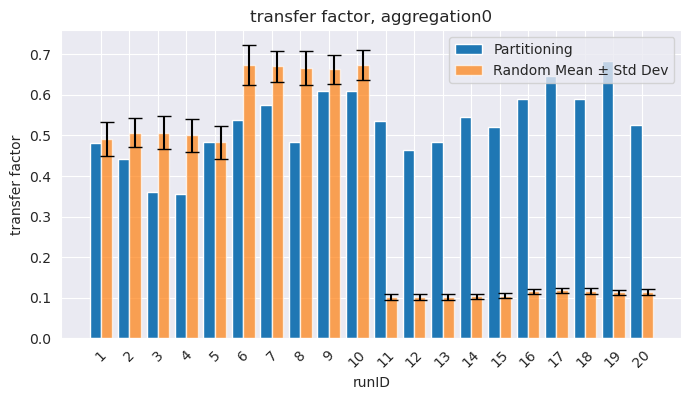

Saved plots/transfer_factor_distribution0.png


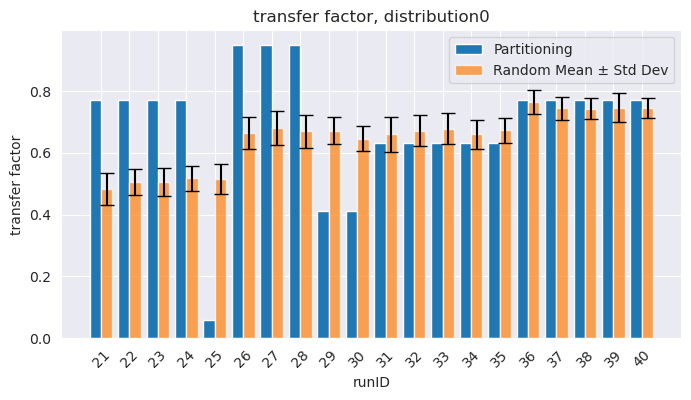

Saved plots/transfer_factor_groups0.png


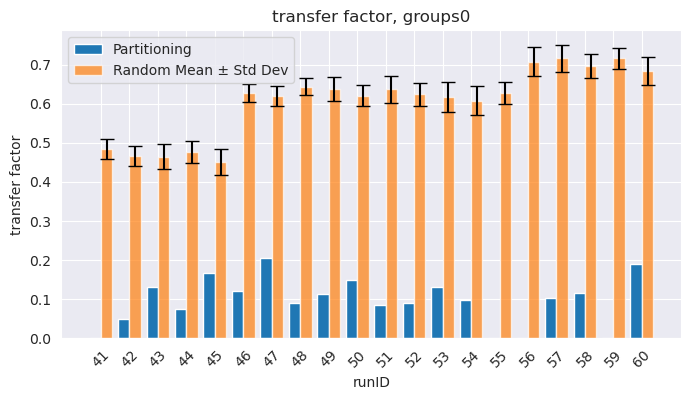

Saved plots/transfer_factor_longPipeline0.png


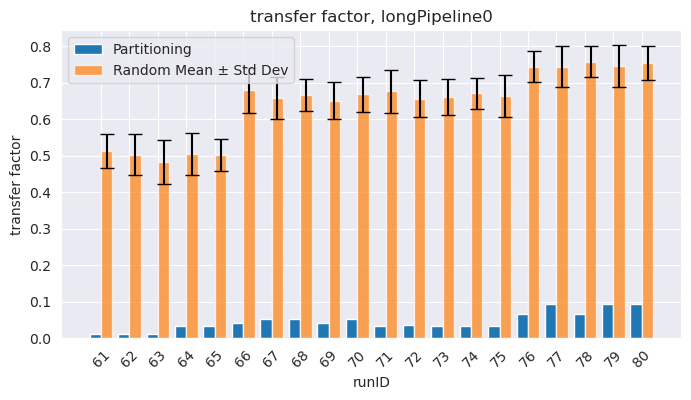

Saved plots/transfer_factor_multiPipeline0.png


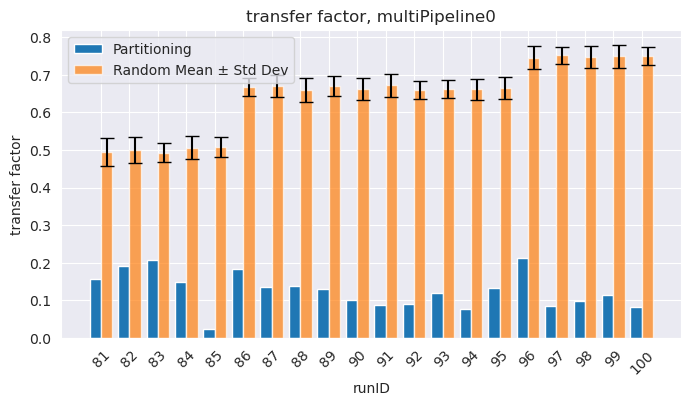

Saved plots/transfer_factor_redistribution0.png


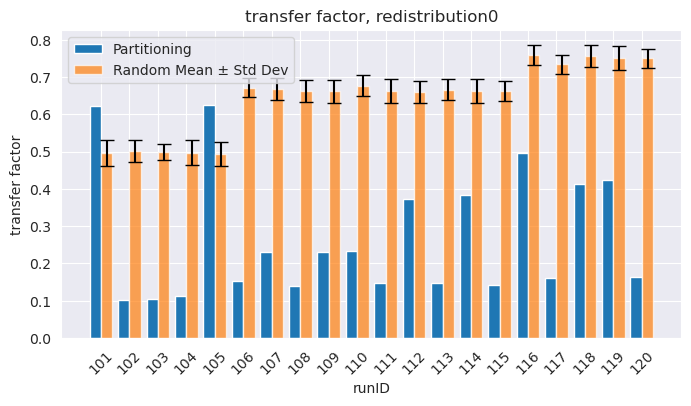

Saved plots/transfer_factor_aggregation1.png


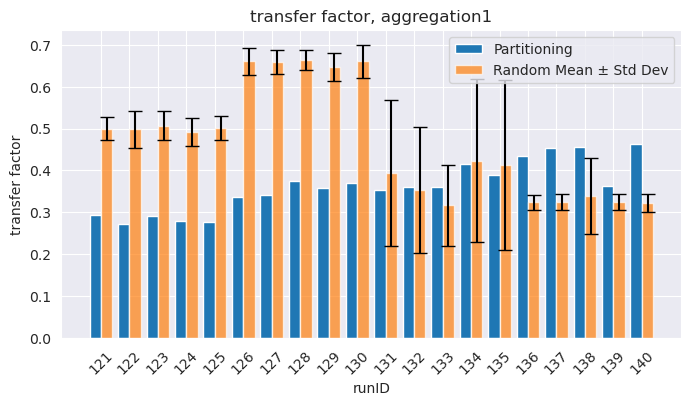

Saved plots/transfer_factor_distribution1.png


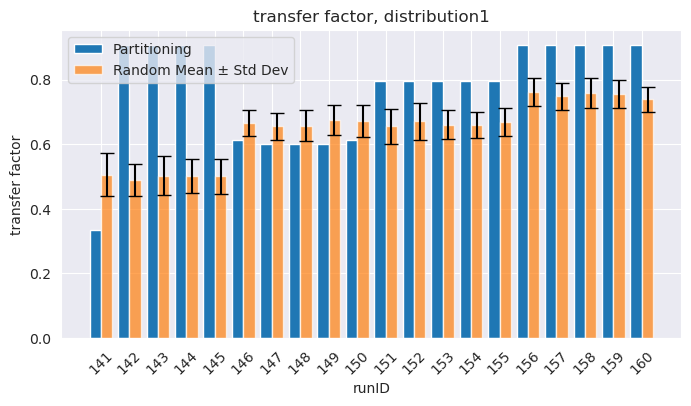

Saved plots/transfer_factor_groups1.png


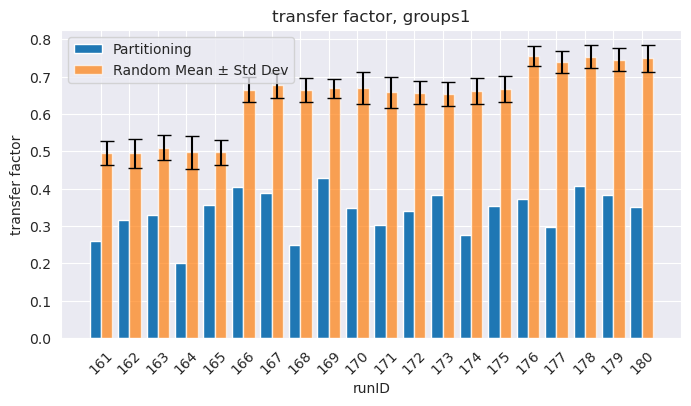

Saved plots/transfer_factor_longPipeline1.png


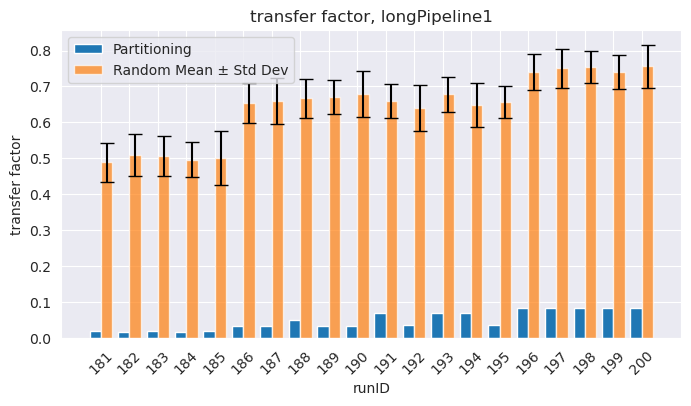

Saved plots/transfer_factor_multiPipeline1.png


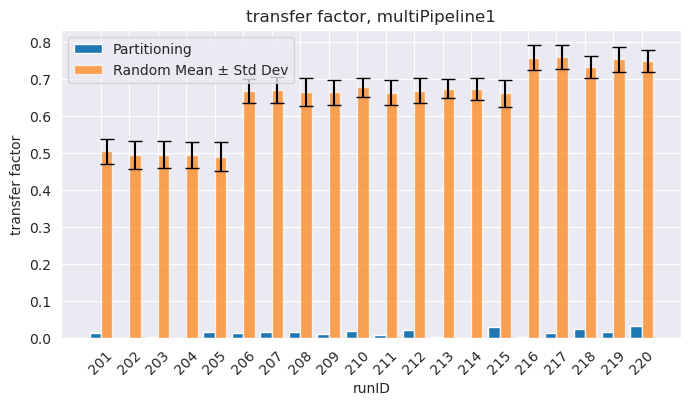

Saved plots/transfer_factor_redistribution1.png


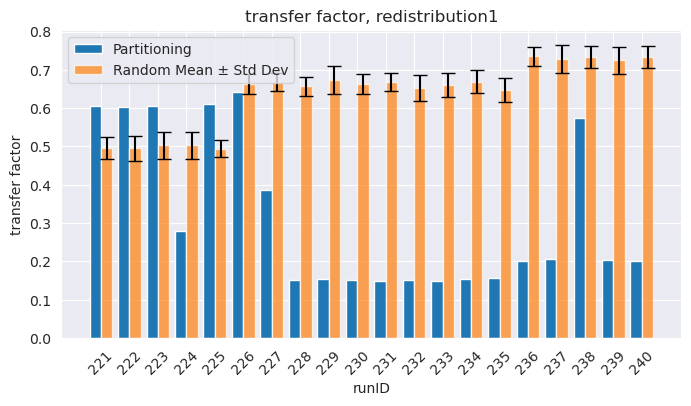

Saved plots/transfer_factor_aggregation2.png


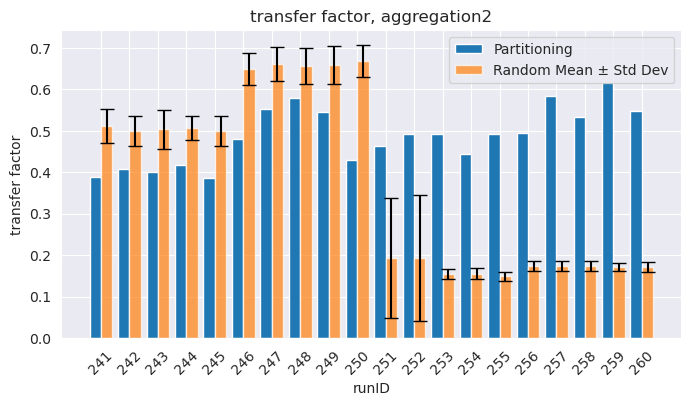

Saved plots/transfer_factor_distribution2.png


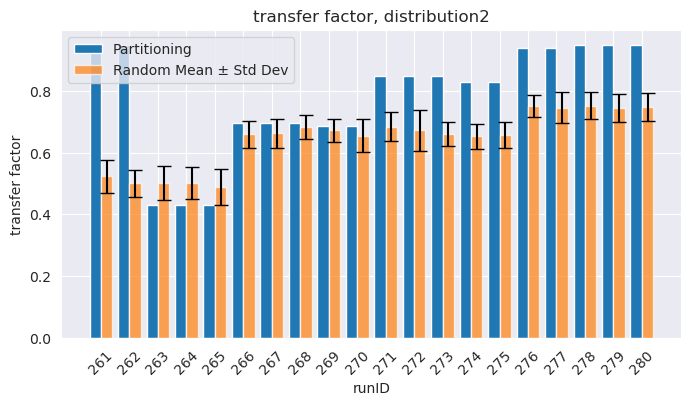

Saved plots/transfer_factor_groups2.png


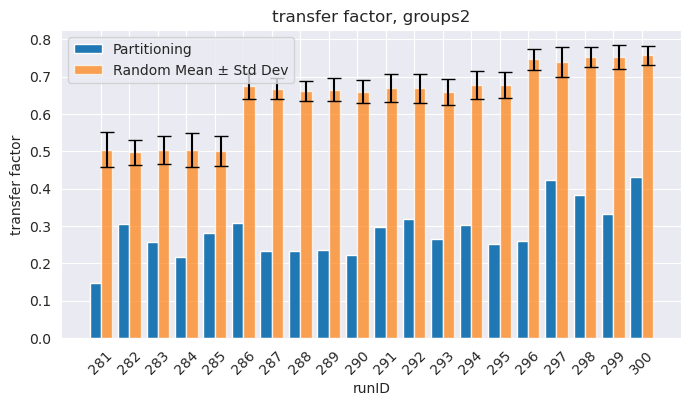

Saved plots/transfer_factor_longPipeline2.png


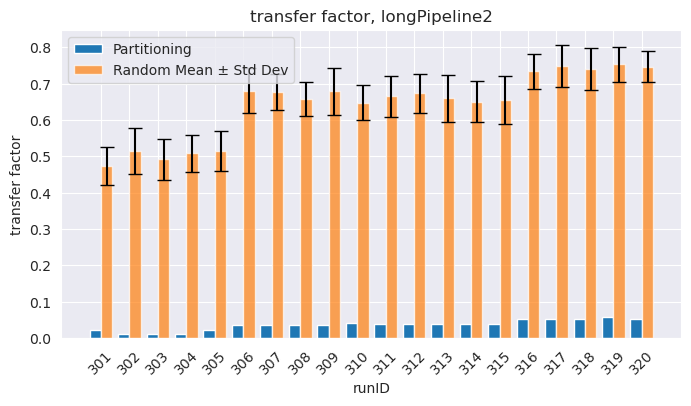

Saved plots/transfer_factor_multiPipeline2.png


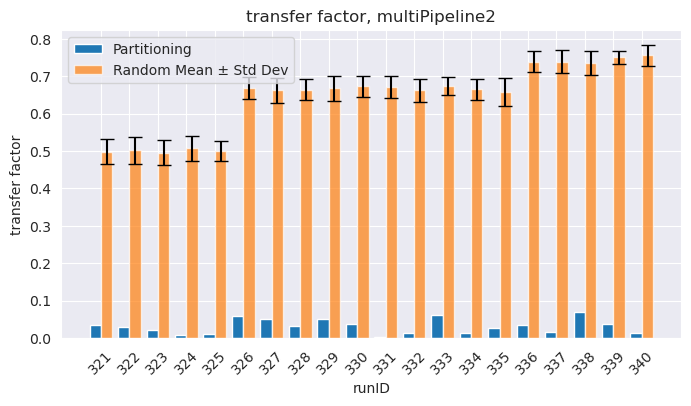

Saved plots/transfer_factor_redistribution2.png


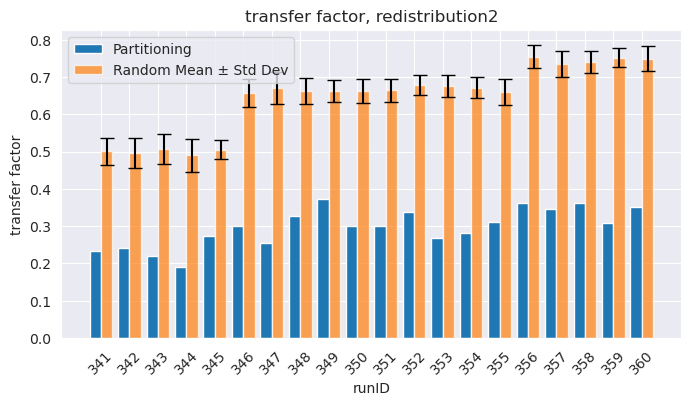

Saved plots/transfer_factor_aggregation3.png


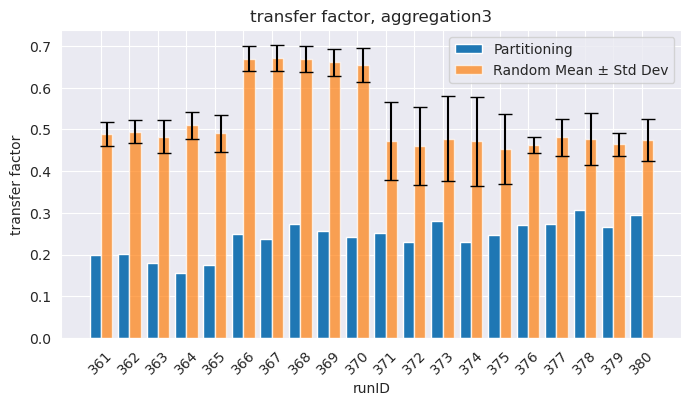

Saved plots/transfer_factor_distribution3.png


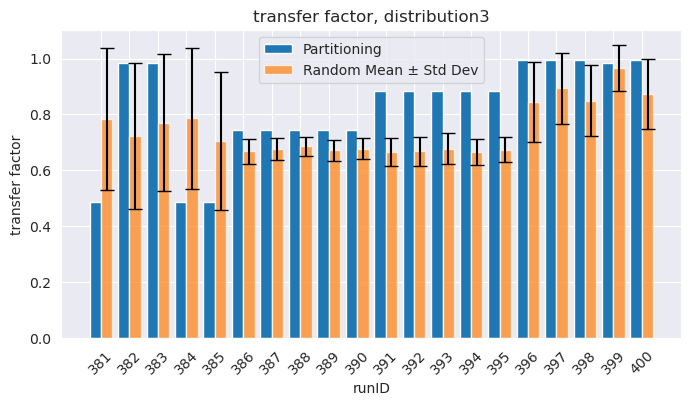

Saved plots/transfer_factor_groups3.png


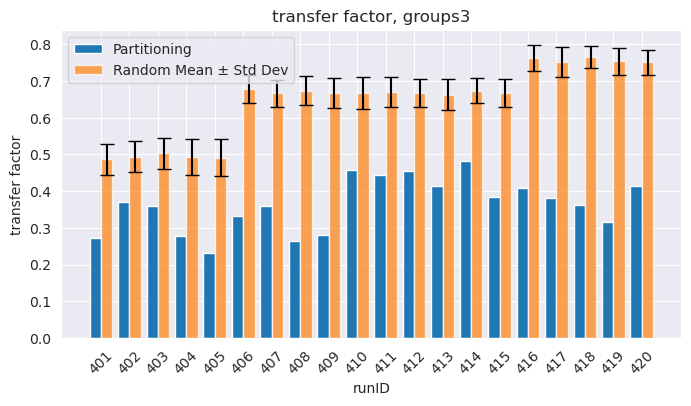

Saved plots/transfer_factor_longPipeline3.png


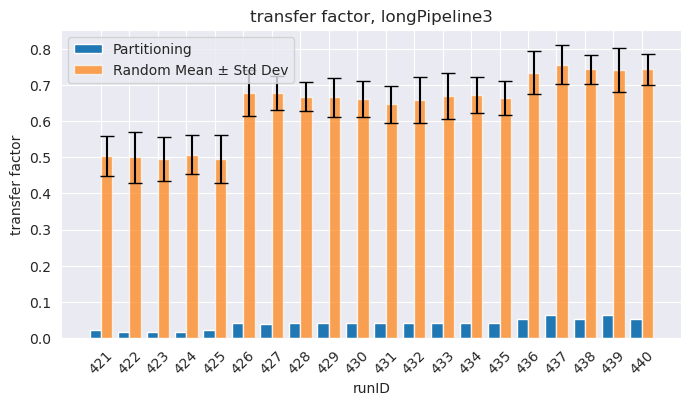

Saved plots/transfer_factor_multiPipeline3.png


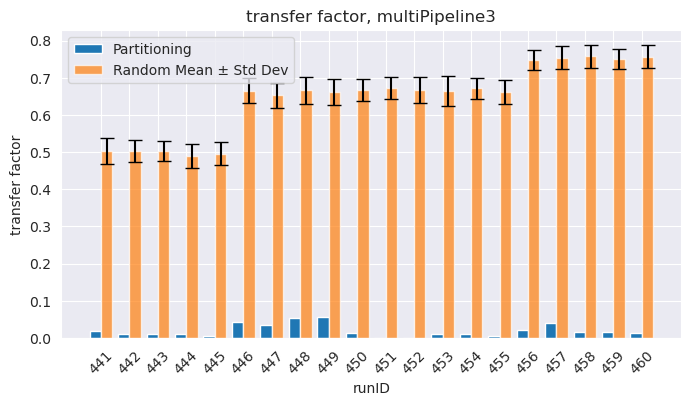

Saved plots/transfer_factor_redistribution3.png


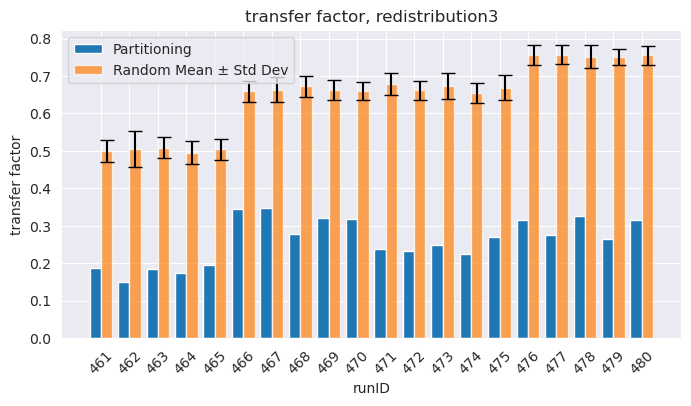

Saved plots/transfer_factor_aggregation4.png


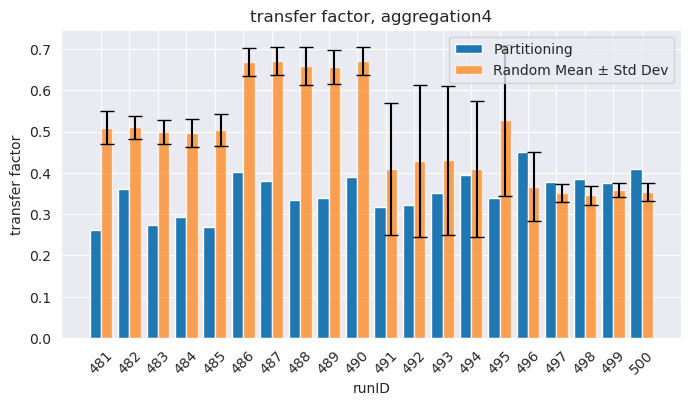

Saved plots/transfer_factor_distribution4.png


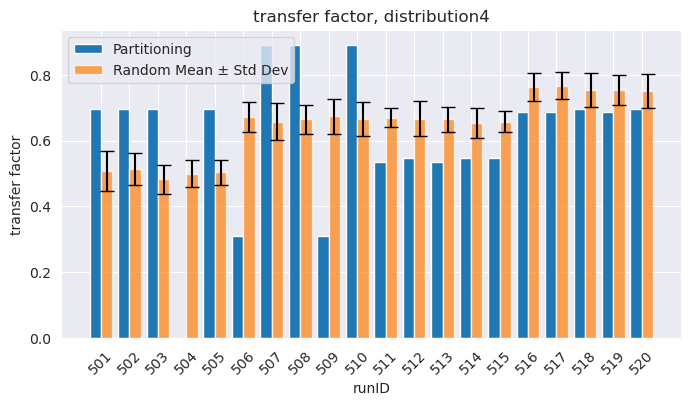

Saved plots/transfer_factor_groups4.png


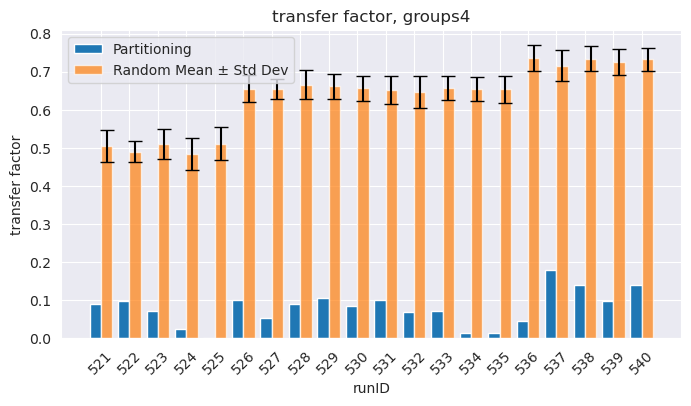

Saved plots/transfer_factor_longPipeline4.png


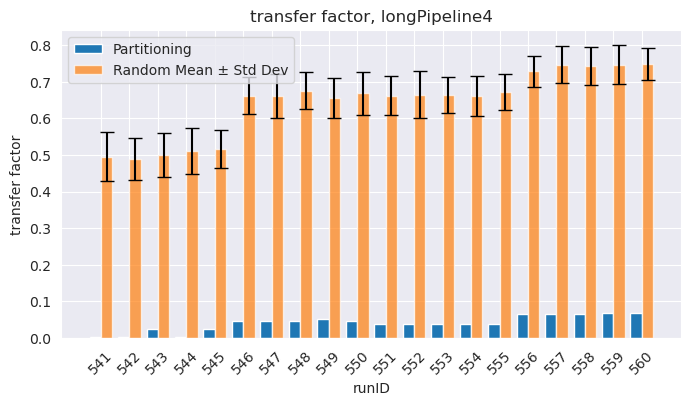

Saved plots/transfer_factor_multiPipeline4.png


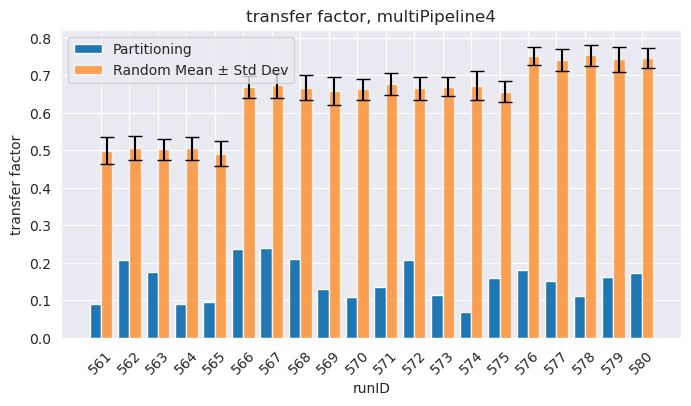

Saved plots/transfer_factor_redistribution4.png


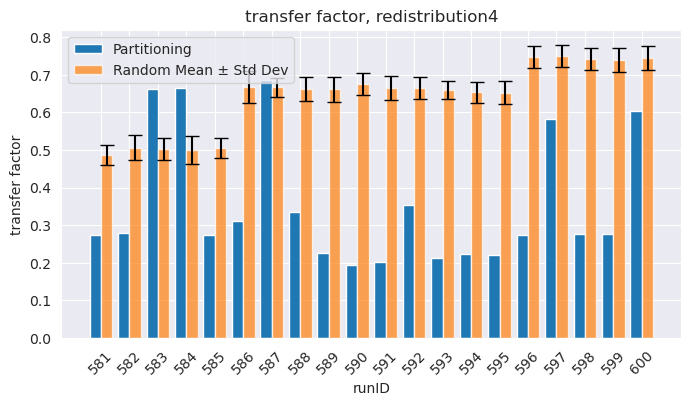

Saved plots/transfer_factor_CyberShake_30.png


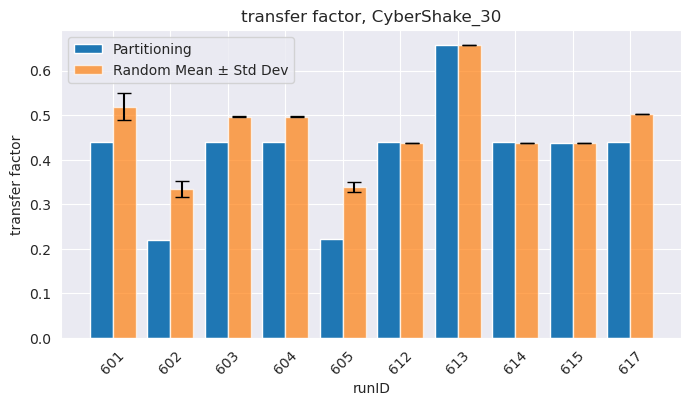

Saved plots/transfer_factor_CyberShake_50.png


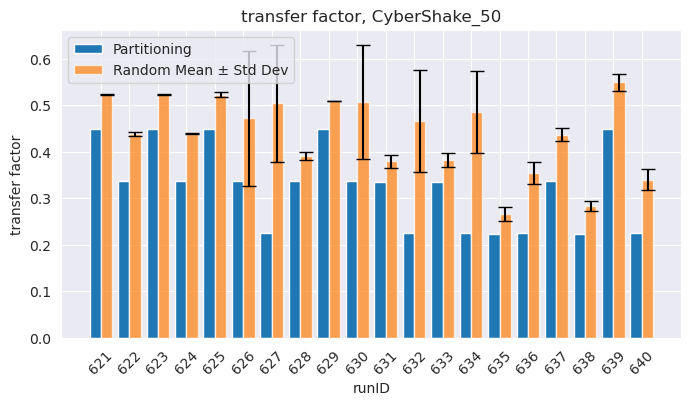

Saved plots/transfer_factor_CyberShake_100.png


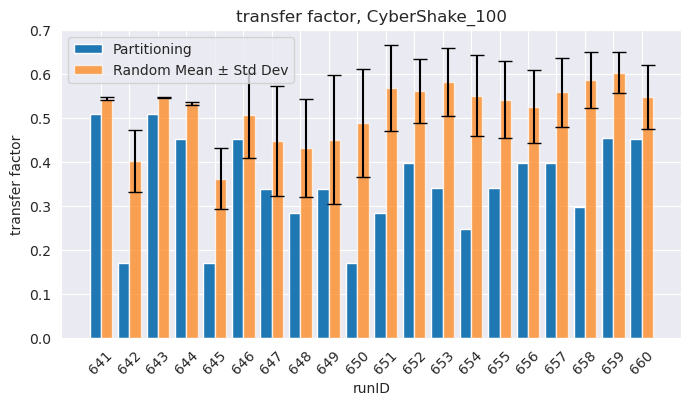

Saved plots/transfer_factor_CyberShake_1000.png


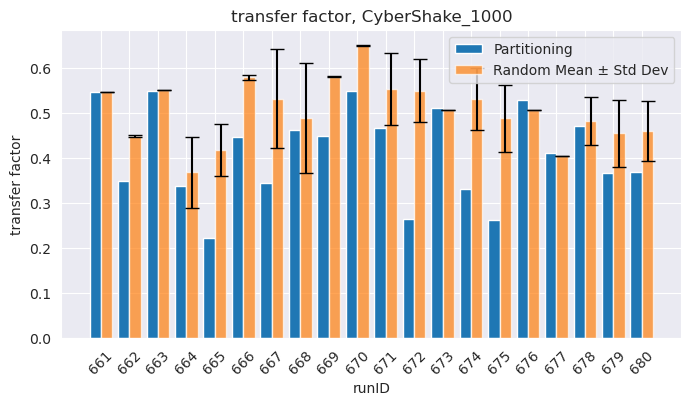

Saved plots/transfer_factor_Epigenomics_24.png


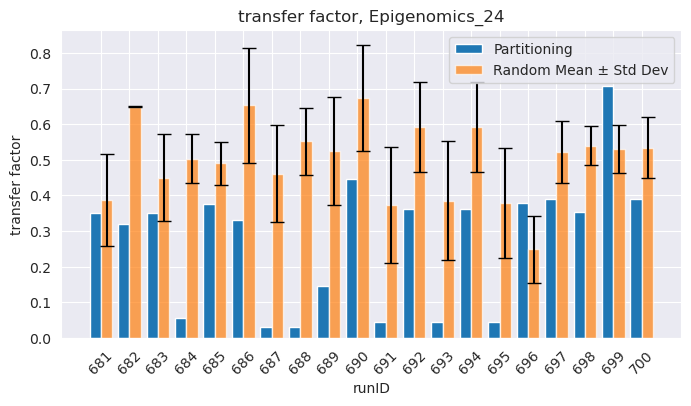

Saved plots/transfer_factor_floodplain.png


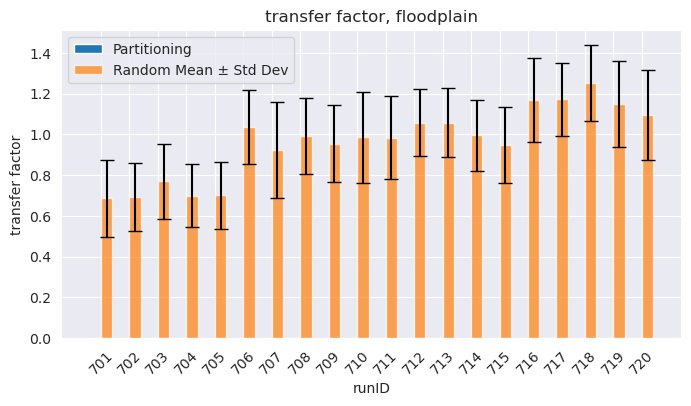

Saved plots/transfer_factor_Sipht_30.xml.png


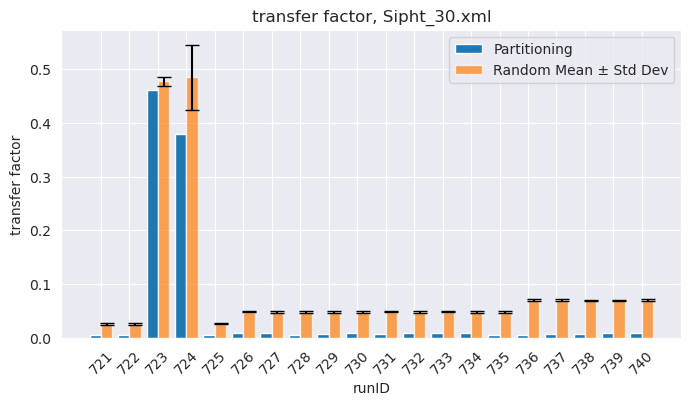

In [88]:
df = results_transfer_factor_df
x_label = "runID"
y_label = "transfer factor"
title = y_label + ", "

unique_names = df['NAME'].unique()

# Iterate over unique names and create separate plots
for name in unique_names:
    subset = df[df['NAME'] == name]

    fig, ax = plt.subplots(figsize=(8, 4))  # Create a new figure for each name

    x = np.arange(len(subset))  # Bar positions
    width = 0.4  # Bar width

    # Deterministic values
    ax.bar(x - width/2, subset['deterministic_value'], width, label='Partitioning')

    # Random mean with error bars (std dev)
    ax.bar(x + width/2, subset['random_mean'], width, yerr=subset['random_dev'], capsize=5,
           label='Random Mean ± Std Dev', alpha=0.7)

    ax.set_xticks(x)
    ax.set_xticklabels(subset.index, rotation=45)
    ax.set_title(f'{title + name}')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()

    # Save the figure separately for each name
    filename = f"plots/{y_label.replace(' ', '_') + '_' + name}.png"
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved {filename}")

    plt.show()  # Show the plot in the notebook
    plt.close(fig)  # Close the figure to free memory


# Plot Makespan


Saved plots/makespan_aggregation0.png


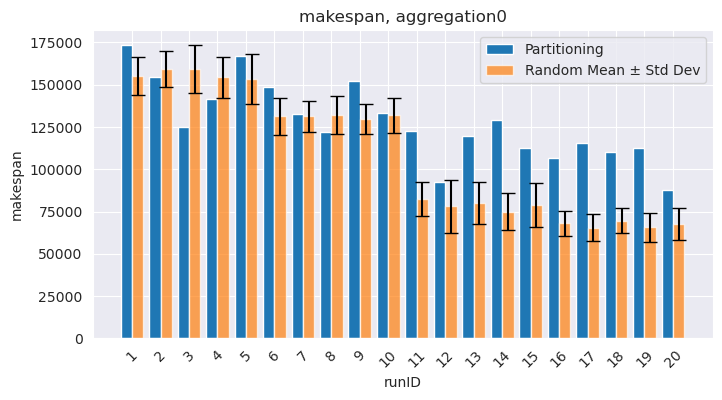

Saved plots/makespan_distribution0.png


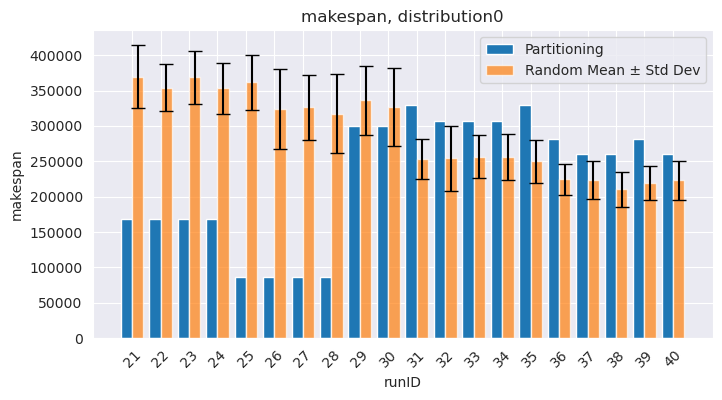

Saved plots/makespan_groups0.png


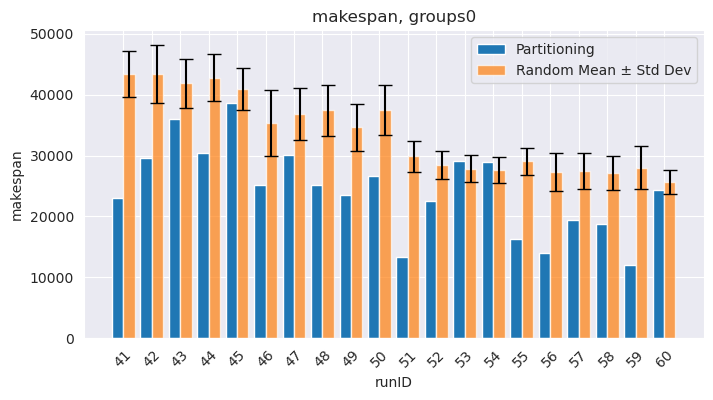

Saved plots/makespan_longPipeline0.png


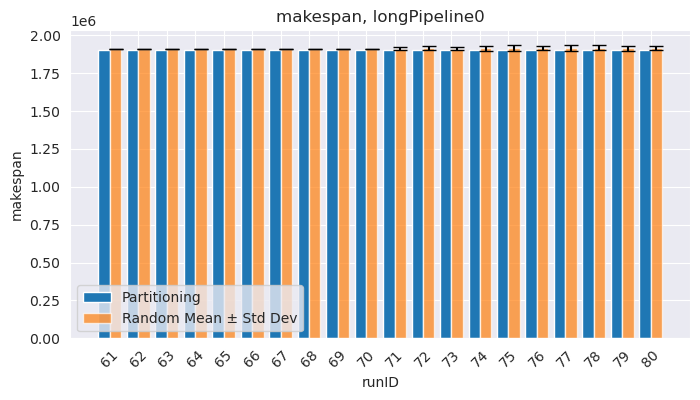

Saved plots/makespan_multiPipeline0.png


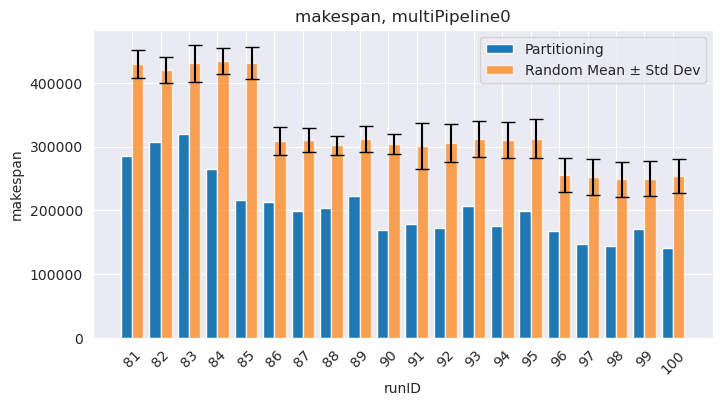

Saved plots/makespan_redistribution0.png


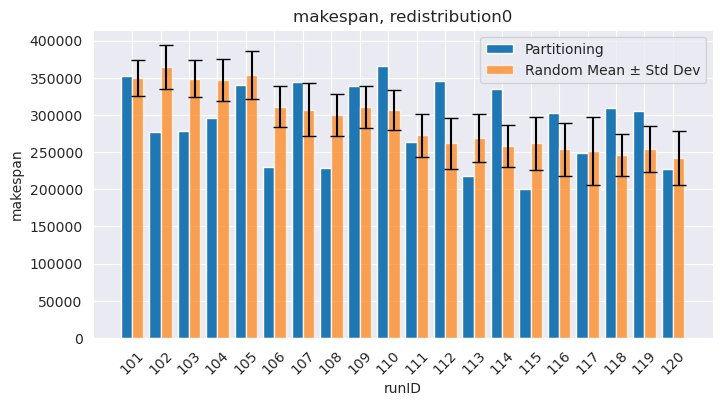

Saved plots/makespan_aggregation1.png


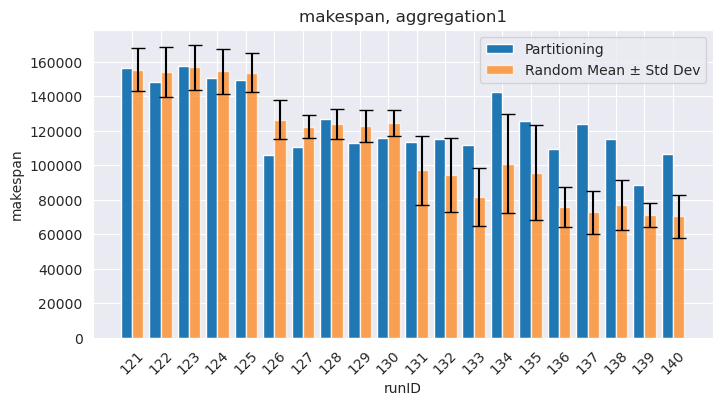

Saved plots/makespan_distribution1.png


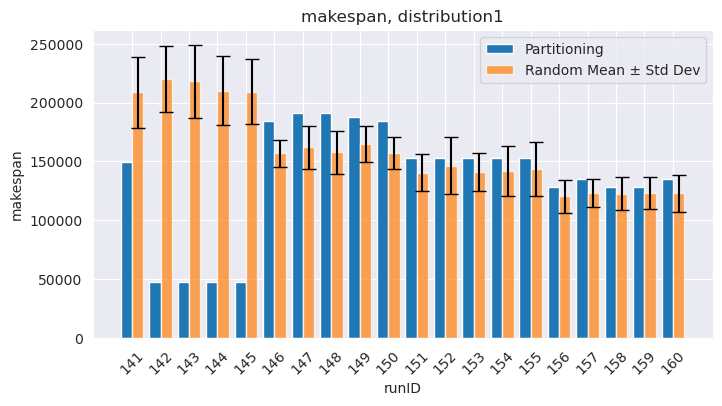

Saved plots/makespan_groups1.png


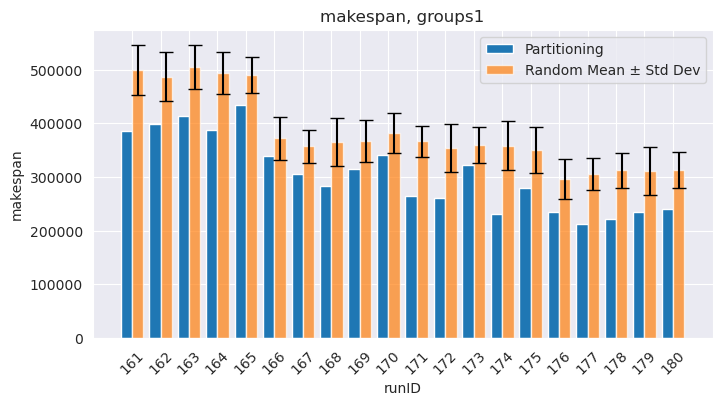

Saved plots/makespan_longPipeline1.png


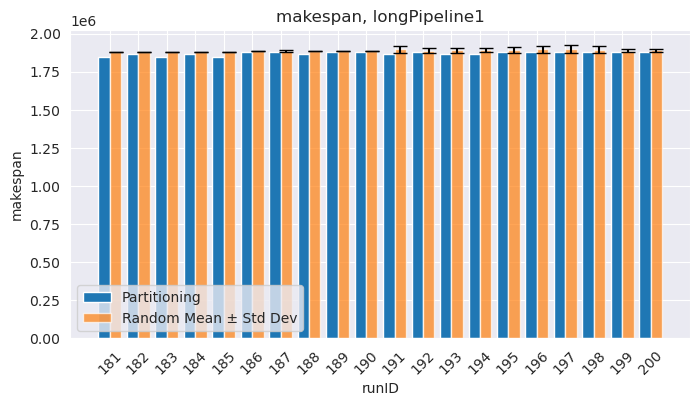

Saved plots/makespan_multiPipeline1.png


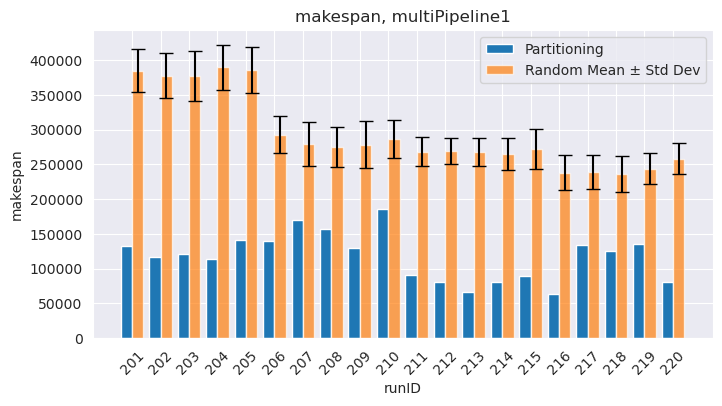

Saved plots/makespan_redistribution1.png


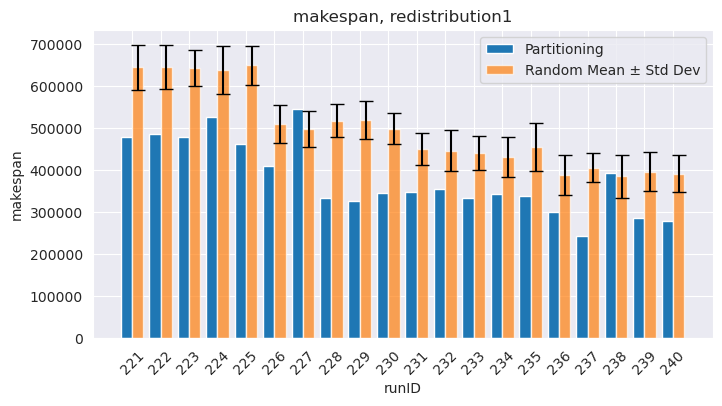

Saved plots/makespan_aggregation2.png


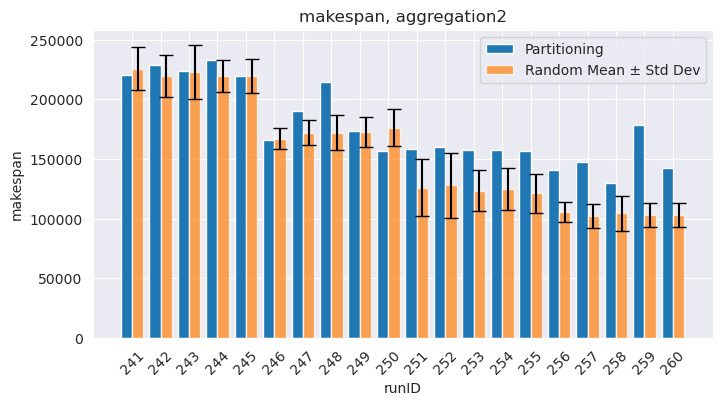

Saved plots/makespan_distribution2.png


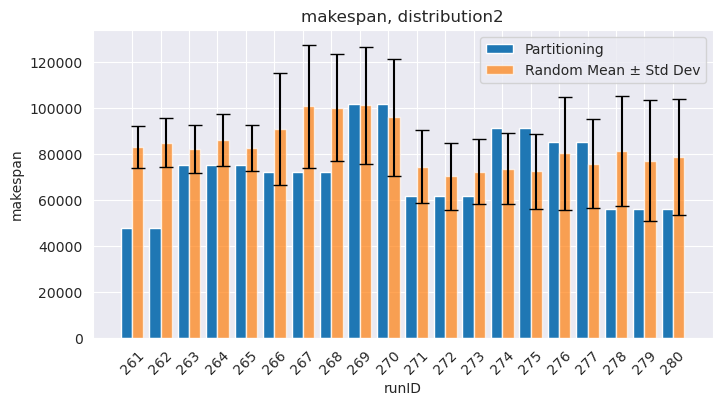

Saved plots/makespan_groups2.png


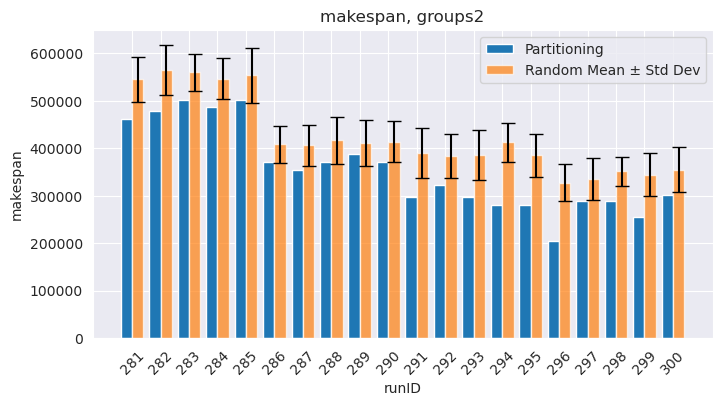

Saved plots/makespan_longPipeline2.png


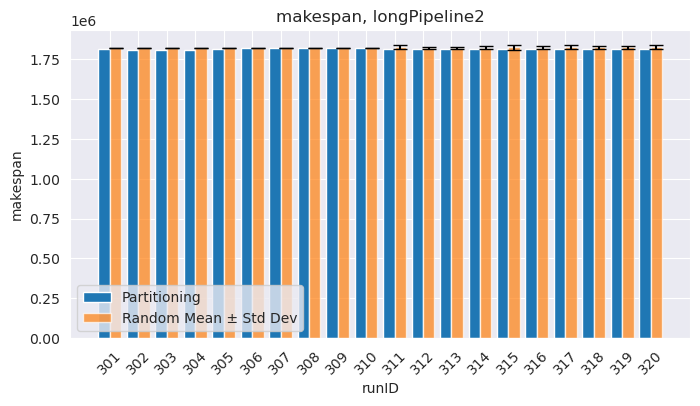

Saved plots/makespan_multiPipeline2.png


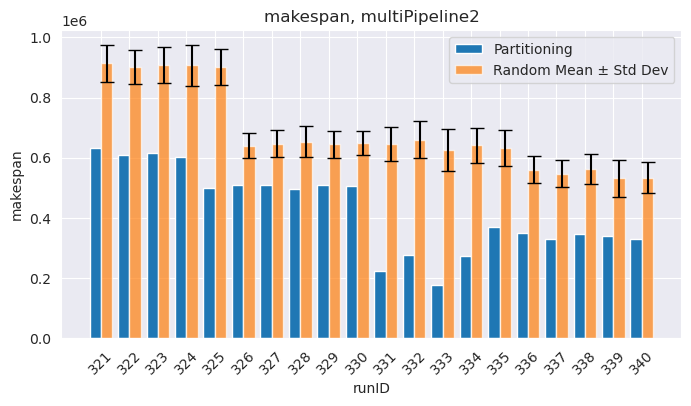

Saved plots/makespan_redistribution2.png


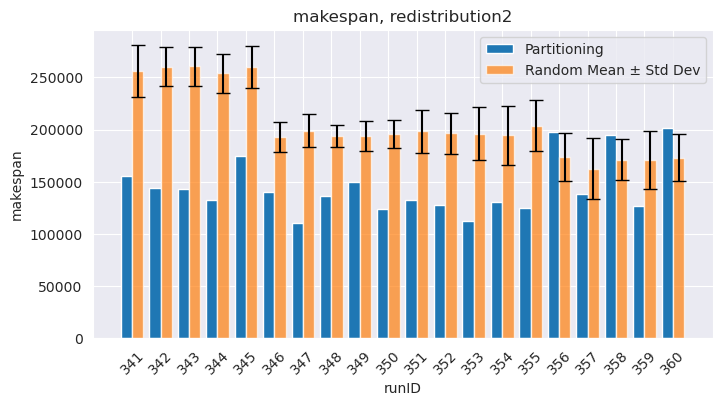

Saved plots/makespan_aggregation3.png


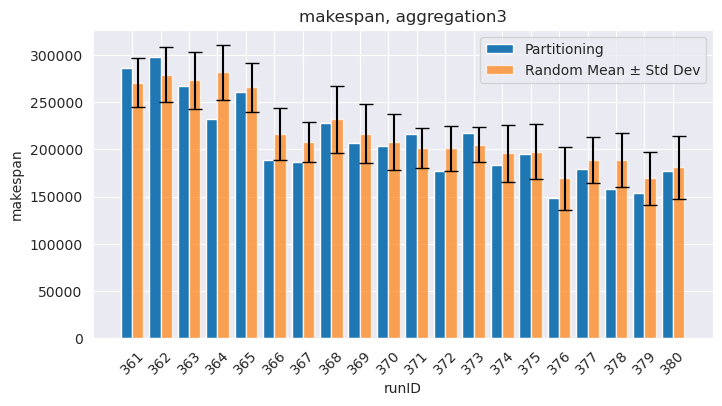

Saved plots/makespan_distribution3.png


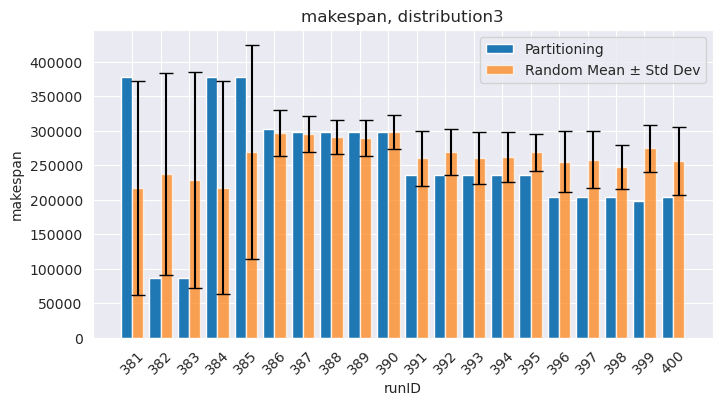

Saved plots/makespan_groups3.png


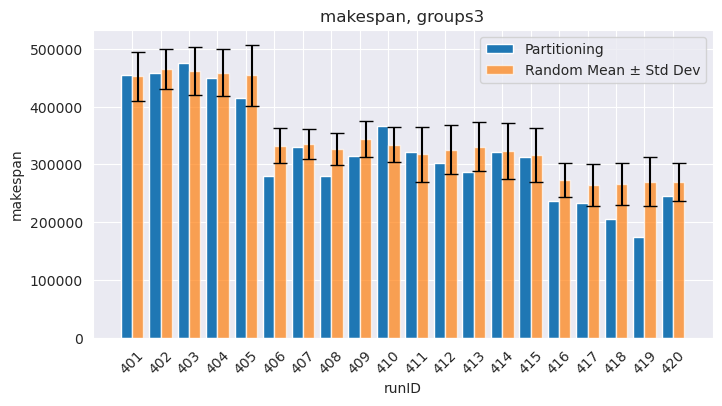

Saved plots/makespan_longPipeline3.png


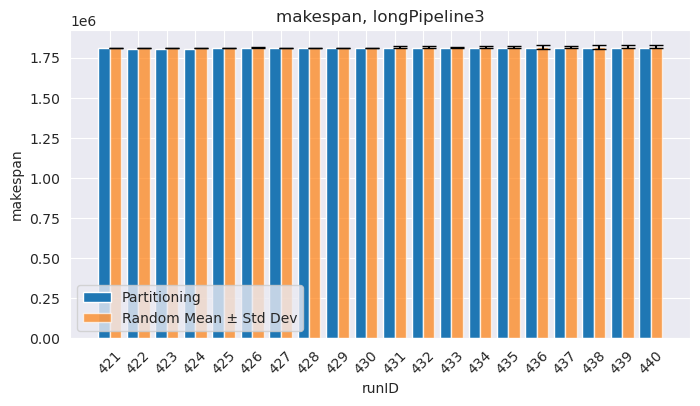

Saved plots/makespan_multiPipeline3.png


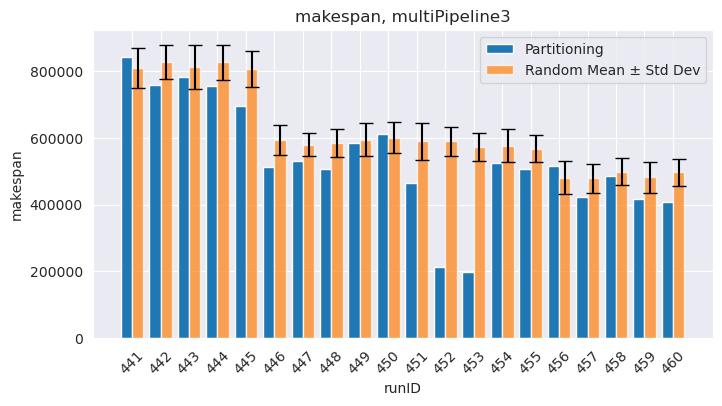

Saved plots/makespan_redistribution3.png


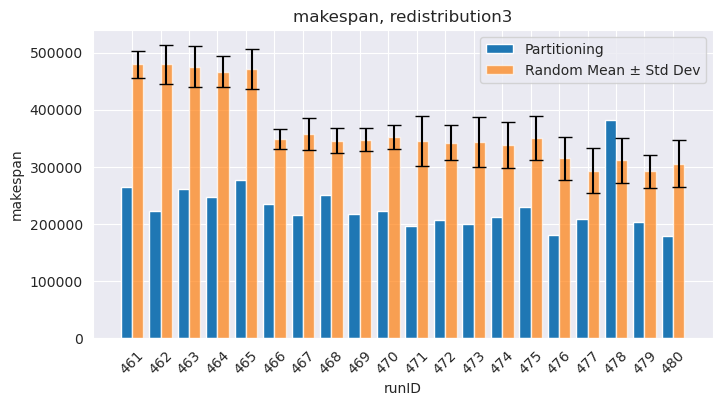

Saved plots/makespan_aggregation4.png


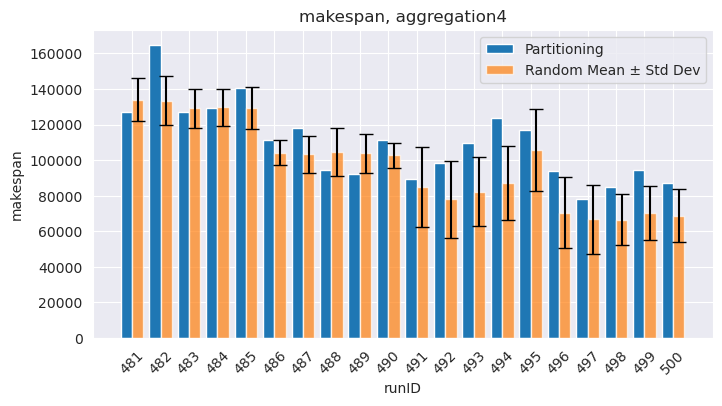

Saved plots/makespan_distribution4.png


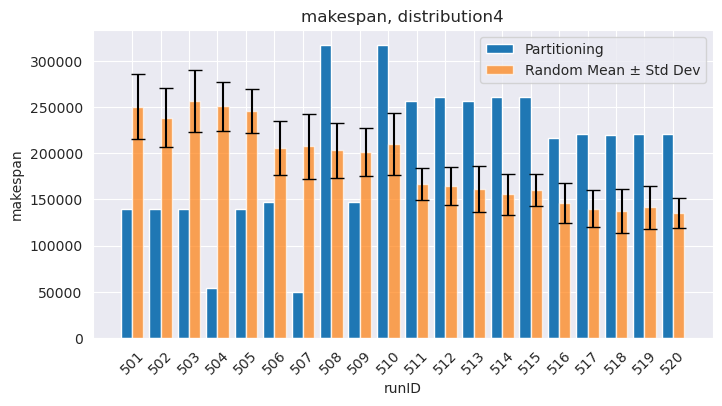

Saved plots/makespan_groups4.png


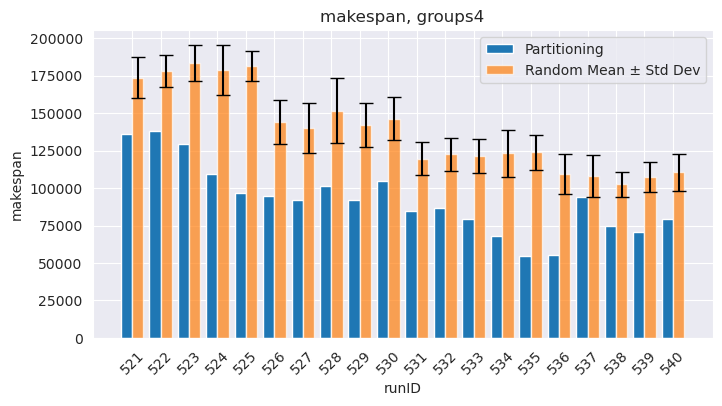

Saved plots/makespan_longPipeline4.png


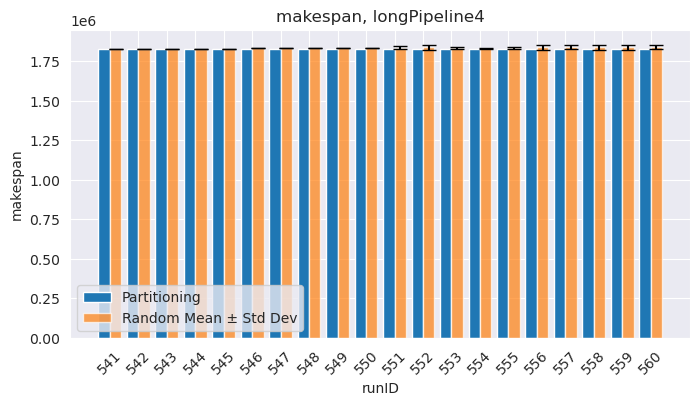

Saved plots/makespan_multiPipeline4.png


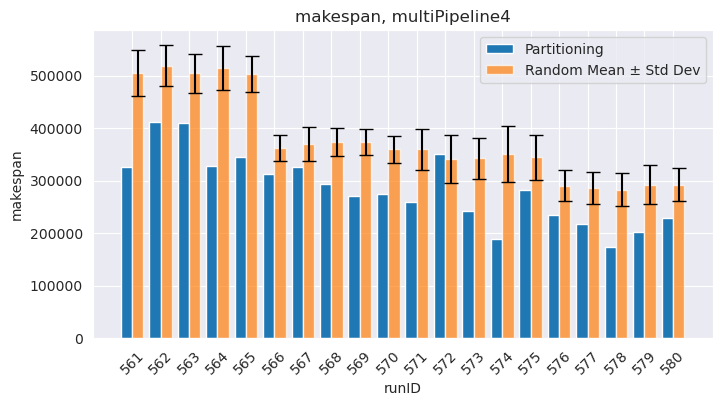

Saved plots/makespan_redistribution4.png


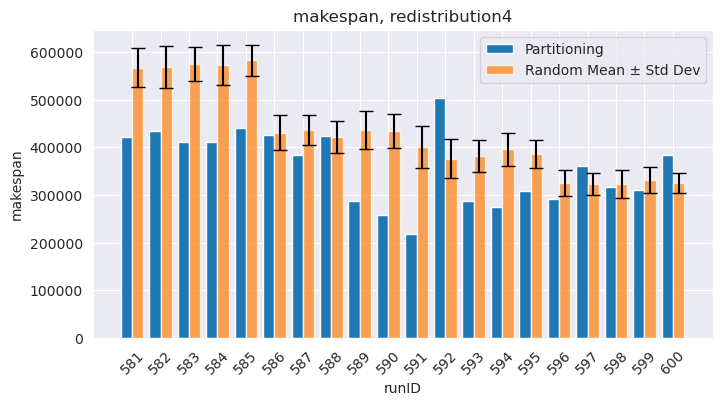

Saved plots/makespan_CyberShake_30.png


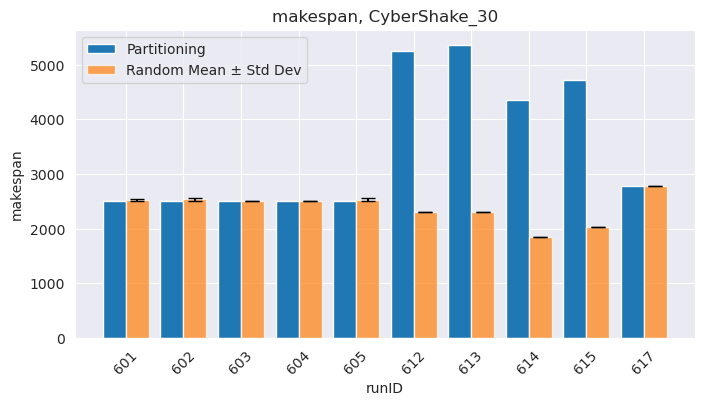

Saved plots/makespan_CyberShake_50.png


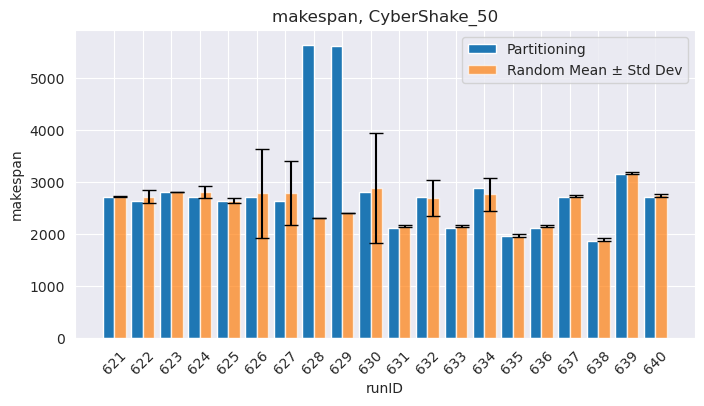

Saved plots/makespan_CyberShake_100.png


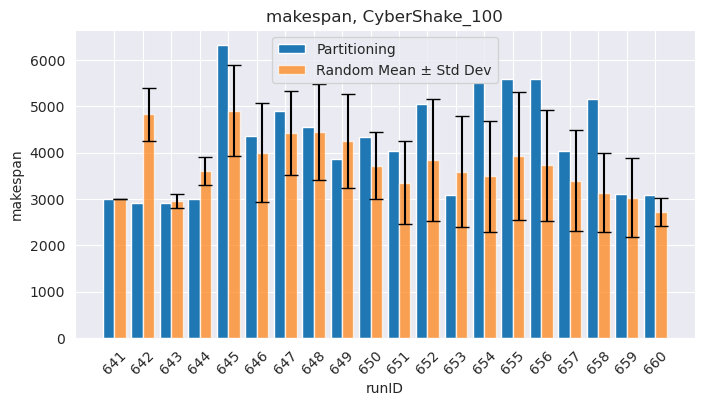

Saved plots/makespan_CyberShake_1000.png


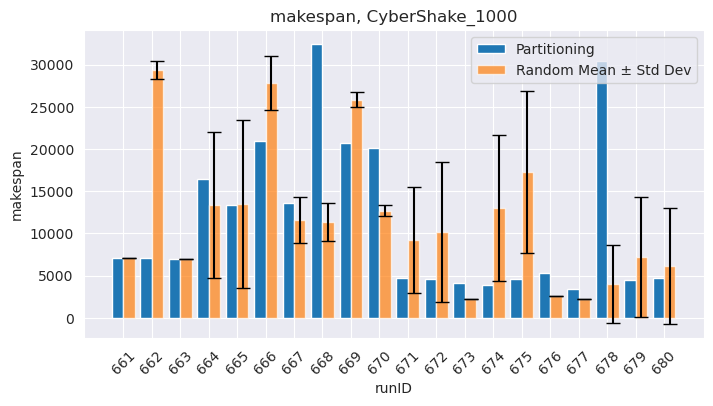

Saved plots/makespan_Epigenomics_24.png


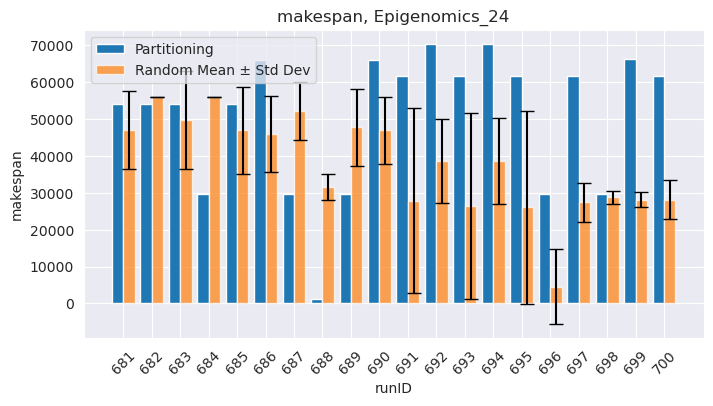

Saved plots/makespan_floodplain.png


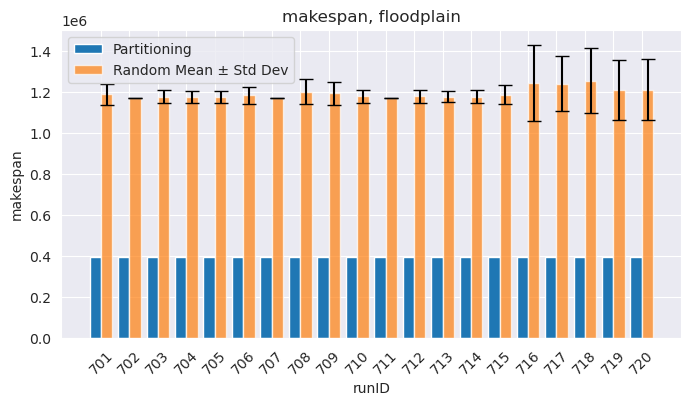

Saved plots/makespan_Sipht_30.xml.png


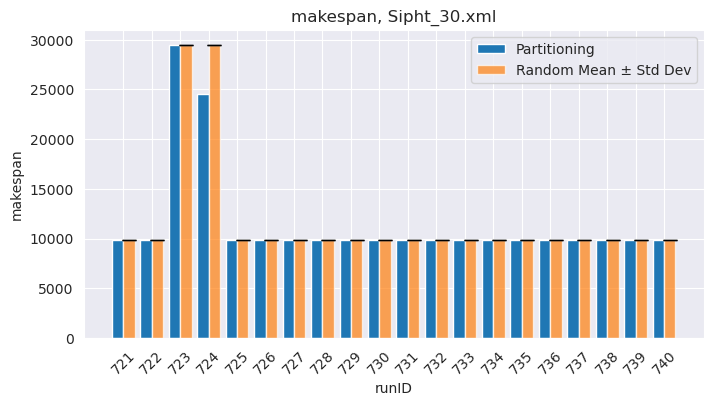

In [89]:
df = results_makespan_df
x_label = "runID"
y_label = "makespan"
title = y_label + ", "

unique_names = df['NAME'].unique()

# Iterate over unique names and create separate plots
for name in unique_names:
    subset = df[df['NAME'] == name]

    fig, ax = plt.subplots(figsize=(8, 4))  # Create a new figure for each name

    x = np.arange(len(subset))  # Bar positions
    width = 0.4  # Bar width

    # Deterministic values
    ax.bar(x - width/2, subset['deterministic_value'], width, label='Partitioning')

    # Random mean with error bars (std dev)
    ax.bar(x + width/2, subset['random_mean'], width, yerr=subset['random_dev'], capsize=5,
           label='Random Mean ± Std Dev', alpha=0.7)

    ax.set_xticks(x)
    ax.set_xticklabels(subset.index, rotation=45)
    ax.set_title(f'{title + name}')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()

    # Save the figure separately for each name
    filename = f"plots/{y_label.replace(' ', '_') + '_' + name}.png"
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved {filename}")

    plt.show()  # Show the plot in the notebook
    plt.close(fig)  # Close the figure to free memory